### Libraries Imported

In [300]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

### Loading all CSV files and creating one single dataframe for all data points

In [215]:
appended_data = []
for infile in glob.glob("*.csv"):
    data = pd.read_csv(infile)
    # store DataFrame in list
    appended_data.append(data)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)


In [391]:
appended_data.head()

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults,cacheId,formattedUrl,...,count,startIndex,inputEncoding,outputEncoding,safe,cx,gl,searchTime,formattedSearchTime,formattedTotalResults
0,flights to hong kong,1,Cheap Flights to Hong Kong (HKG) from $397 - K...,"Find flights to Hong Kong on XiamenAir, Hong K...",www.kayak.com,https://www.kayak.com/flight-routes/United-Sta...,2018-12-16 11:26:30.485612+00:00,106000000,W42baDpas_gJ,https://www.kayak.com/flight-routes/United.../...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"
1,flights to hong kong,2,"$480 Flights to Hong Kong, China (HKG) - TripA...",Cheap Flights to Hong Kong: Enter your dates o...,www.tripadvisor.com,https://www.tripadvisor.com/Flights-g294217-Ho...,2018-12-16 11:26:30.485612+00:00,106000000,5jsjhmxgxvkJ,https://www.tripadvisor.com/Flights-g294217-Ho...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"
2,flights to hong kong,3,Cheap Flights to Hong Kong International from ...,Search cheap flights using Skyscanner's free f...,www.skyscanner.com,https://www.skyscanner.com/flights-to/hkg/chea...,2018-12-16 11:26:30.485612+00:00,106000000,EI78TI4Q1qYJ,https://www.skyscanner.com/flights-to/hkg/chea...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"
3,flights to hong kong,4,Flights to Hong Kong (HKG) | Hong Kong Flight ...,Find & book great deals on Hong Kong (HKG) Fli...,flights.cathaypacific.com,https://flights.cathaypacific.com/en-us/flight...,2018-12-16 11:26:30.485612+00:00,106000000,q6kszaD7mggJ,https://flights.cathaypacific.com/en-us/flight...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"
4,flights to hong kong,5,"Cheap Flights to Hong Kong SAR, Asia $393.97 i...",Expedia Add-On Advantage: Book a flight & unlo...,www.expedia.com,https://www.expedia.com/Cheap-Flights-To-Hong-...,2018-12-16 11:26:30.485612+00:00,106000000,iEmRbX0P8CAJ,https://www.expedia.com/Cheap-Flights-To-Hong-...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"


In [392]:
appended_data.shape

(68000, 26)

### Creating dataframe with only useful info for analysis

In [217]:
data=appended_data[['searchTerms', 'rank','displayLink','queryTime', 'totalResults','formattedSearchTime']]

In [218]:
data.dtypes

searchTerms             object
rank                     int64
displayLink             object
queryTime               object
totalResults             int64
formattedSearchTime    float64
dtype: object

### Extracting date from querytime column

In [393]:
data['searchdate']=[i.split()[0] for i in data.queryTime]
data.head()


C:\Users\Manu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,searchTerms,rank,displayLink,queryTime,totalResults,formattedSearchTime,searchdate
0,flights to hong kong,1,www.kayak.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16
1,flights to hong kong,2,www.tripadvisor.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16
2,flights to hong kong,3,www.skyscanner.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16
3,flights to hong kong,4,flights.cathaypacific.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16
4,flights to hong kong,5,www.expedia.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16


### Converting searchdate to date format

In [220]:
data['searchdate'] = data['searchdate'].astype('datetime64[ns]')


C:\Users\Manu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [221]:
data.dtypes

searchTerms                    object
rank                            int64
displayLink                    object
queryTime                      object
totalResults                    int64
formattedSearchTime           float64
searchdate             datetime64[ns]
dtype: object

In [377]:
data.head()

,searchTerms,rank,displayLink,queryTime,totalResults,formattedSearchTime,searchdate
0,flights to hong kong,1,www.kayak.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16
1,flights to hong kong,2,www.tripadvisor.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16
2,flights to hong kong,3,www.skyscanner.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16
3,flights to hong kong,4,flights.cathaypacific.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16
4,flights to hong kong,5,www.expedia.com,2018-12-16 11:26:30.485612+00:00,106000000,0.16,2018-12-16


### Grouping and arranging search terms by mean search time and mean of total search results

In [223]:
grouped=data.groupby(['searchTerms'],as_index=False).agg({'formattedSearchTime':'mean','totalResults':'mean'})
grouped.head()

,searchTerms,formattedSearchTime,totalResults
0,flights to abu dhabi,0.328824,2.414412e+07
1,flights to agra,0.305000,1.788559e+07
2,flights to amsterdam,0.293824,8.762618e+07
3,flights to antalya,0.330294,9.282941e+06
4,flights to artvin,0.327647,1.427794e+05


### Search terms with least search time

In [395]:
sorted_searchtime=grouped.sort_values('formattedSearchTime',ascending=True)
sorted_searchtime[['searchTerms','formattedSearchTime']].head()

,searchTerms,formattedSearchTime
131,tickets to guilin,0.235294
31,flights to guilin,0.249412
41,flights to jeju,0.250000
156,tickets to marrakesh,0.251471
178,tickets to riyadh,0.254118


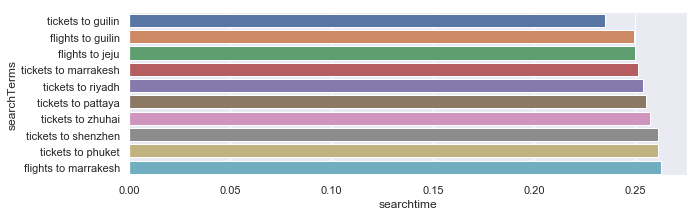

In [364]:
ax2 = sns.barplot(x='formattedSearchTime', y='searchTerms', data=sorted_searchtime.head(10))
ax2.set_xlabel('searchtime')
sns.set(rc={'figure.figsize':(10,3)})

### Search terms with most search results

In [379]:
sorted_searchresults=grouped.sort_values('totalResults',ascending=False)
sorted_searchresults.head()

,searchTerms,formattedSearchTime,totalResults
165,tickets to new york city,0.409412,1.493438e+09
152,tickets to london,0.336471,5.486471e+08
166,tickets to nice,0.284118,3.553882e+08
65,flights to new york city,0.464412,3.469088e+08
52,flights to london,0.381176,3.276882e+08


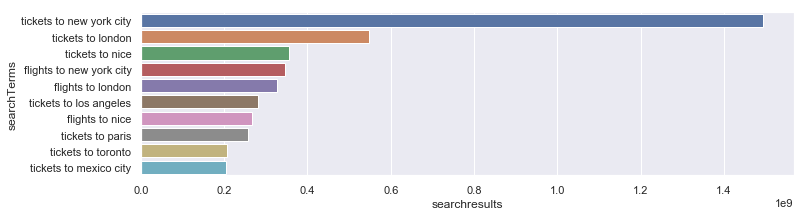

In [363]:
ax1 = sns.barplot(x='totalResults', y='searchTerms', data=sorted_searchresults.head(10))
ax1.set_xlabel('searchresults')
sns.set(rc={'figure.figsize':(10,3)})

### Frequently ranked domains

In [341]:
top=data['displayLink'].value_counts().head(10)
df=top.reset_index()
df

,index,displayLink
0,www.skyscanner.net,5906
1,www.tripadvisor.com,4725
2,www.expedia.com,4176
3,www.kayak.com,3331
4,www.cheapflights.com,3126
5,www.kayak.co.uk,3018
6,www.skyscanner.com,2811
7,www.expedia.co.uk,2776
8,www.cheapflights.co.uk,2679
9,www.tripadvisor.co.uk,2294


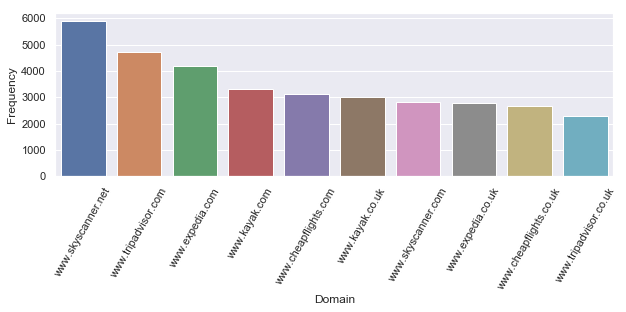

In [380]:

ax3 = sns.barplot(x='index', y='displayLink', data=df)
ax3.set_xlabel('Domain')
ax3.set_ylabel('Frequency')
sns.set(rc={'figure.figsize':(10,3)})
loc, labels = plt.xticks()
ax3.set_xticklabels(labels, rotation=60)
plt.show()

### Generating a function that can estimate the best domain for a trip to any destination.

In [298]:
def best_domain(rank,destination):
    ranks_df=data[data['rank']==rank].sort_values('searchdate',ascending=True)
    destination_df=ranks_df[ranks_df['searchTerms']==destination]
    results=plt.scatter(destination_df['searchdate'],destination_df['displayLink'])
    return results

    
    

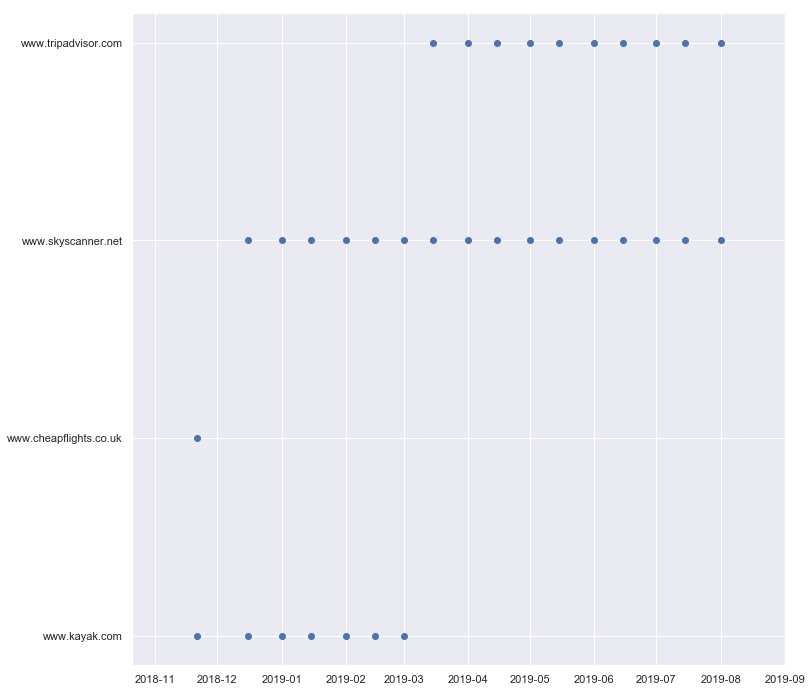

In [299]:
best_domain(1,'tickets to new york city')